In [1]:
!conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_libgcc_mutex             0.1                        main  
alabaster                 0.7.12                   py37_0  
anaconda                  2020.02                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.12                   py37_0  
anaconda-project          0.8.4                      py_0  
argh                      0.26.2                   py37_0  
asn1crypto                1.3.0                    py37_0  
astroid                   2.3.3                    py37_0  
astropy                   4.0              py37h7b6447c_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.3.0                     py_0  
autopep8                  1.4.4                      py_0  
awscli                    1.18.160                

In [3]:
conda -c conda-forge install unicode


CommandNotFoundError: No command 'conda conda-forge'.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install s3fs -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==2020.02=py37_0
  - defaults/noarch::numpydoc==0.9.2=py_0
  - defaults/noarch::sphinx==2.4.0=py_0
  - defaults/linux-64::spyder==4.0.1=py37_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==2020.02=py37_0
  - defaults/noarch::numpydoc==0.9.2=py_0
  - defaults/noarch::sphinx==2.4.0=py_0
  - defaults/linux-64::spyder==4.0.1=py37_0
done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - s3fs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_

In [1]:
import s3fs

In [2]:
import csv
import sys

**Checking the field size limit for csv because from past attempt to load the data, i get `_csv.Error: field larger than field limit (131072)`

In [3]:
csv.field_size_limit()

131072

**The following script i found on stackoverflow will increase the csv filed limit to the maximmum**

In [4]:

maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)
        


In [5]:
csv.field_size_limit()

9223372036854775807

In [6]:
import pandas as pd
input_data = 's3://sagemaker-studio-zvdmh7fos3/news_cleaned_2018_02_13.csv'

In [7]:
chunksize = 500000 # 500 thousand rows at one go.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import csv
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import seaborn as sns
import dask.dataframe as dd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='darkgrid',palette='Dark2',rc={'figure.figsize':(9,6),'figure.dpi':100}) #setting seaborn plot size and resolution

In [10]:
%%time
df_list = [] # list to hold the batch dataframe

for df_chunk in tqdm(pd.read_csv(input_data, chunksize=chunksize, encoding ='utf-8', engine='python')):
    
    # append the chunk to list and merge all
    df_list.append(df_chunk)

18it [25:24, 84.72s/it]

CPU times: user 8min 38s, sys: 1min 37s, total: 10min 15s
Wall time: 25min 25s


In [11]:

%%time
# Merge all the chunked dataframes into one dataframe
frl_df = pd.concat(df_list)

# Delete the chunked dataframe list to release memory
del df_list

# See what we have loaded
frl_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529090 entries, 0 to 8529089
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        object 
 1   id                object 
 2   domain            object 
 3   type              object 
 4   url               object 
 5   content           object 
 6   scraped_at        object 
 7   inserted_at       object 
 8   updated_at        object 
 9   title             object 
 10  authors           object 
 11  keywords          float64
 12  meta_keywords     object 
 13  meta_description  object 
 14  tags              object 
 15  summary           float64
 16  source            object 
dtypes: float64(2), object(15)
memory usage: 1.1+ GB
CPU times: user 8.53 s, sys: 2.32 s, total: 10.9 s
Wall time: 10.8 s


In [12]:
def missing_value(df):
    """" Function to calculate the number and percent of missing values in a dataframe"""
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_value = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return missing_value

In [13]:
missing_value(frl_df)

,Total,Percent
keywords,8529090,100.000000
summary,8529090,100.000000
source,6648509,77.950977
tags,6560614,76.920445
meta_description,4481955,52.549041
authors,3791648,44.455481
type,403332,4.728898
meta_keywords,338030,3.963260
title,73368,0.860209
scraped_at,147,0.001724


In [14]:
print(frl_df.head())
print(frl_df.tail())

  Unnamed: 0 id              domain   type  \
0          0  2       express.co.uk  rumor   
1          1  6  barenakedislam.com   hate   
2          2  7  barenakedislam.com   hate   
3          3  8  barenakedislam.com   hate   
4          4  9  barenakedislam.com   hate   

                                                 url  \
0  https://www.express.co.uk/news/science/738402/...   
1  http://barenakedislam.com/category/donald-trum...   
2  http://barenakedislam.com/category/donald-trum...   
3  http://barenakedislam.com/2017/12/24/more-winn...   
4  http://barenakedislam.com/2017/12/25/oh-trump-...   

                                             content  \
0  Life is an illusion, at least on a quantum lev...   
1  Unfortunately, he hasn’t yet attacked her for ...   
2  The Los Angeles Police Department has been den...   
3  The White House has decided to quietly withdra...   
4  “The time has come to cut off the tongues of t...   

                   scraped_at                 ins

In [15]:
list(frl_df.columns)

['Unnamed: 0',
 'id',
 'domain',
 'type',
 'url',
 'content',
 'scraped_at',
 'inserted_at',
 'updated_at',
 'title',
 'authors',
 'keywords',
 'meta_keywords',
 'meta_description',
 'tags',
 'summary',
 'source']

**Out of the 17 columns, I decided to drop all columns with more than 76% missing values plus url, id, Unnamed**

In [16]:
frl_df.drop(['id','keywords','url','content','meta_description','meta_keywords','authors','summary','source','Unnamed: 0'], axis=1, inplace=True)

In [17]:
frl_df.head()

,domain,type,scraped_at,inserted_at,updated_at,title,tags
0,express.co.uk,rumor,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Is life an ILLUSION? Researchers prove 'realit...,NaN
1,barenakedislam.com,hate,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,NaN
2,barenakedislam.com,hate,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,NaN
3,barenakedislam.com,hate,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"MORE WINNING! Israeli intelligence source, DEB...",NaN
4,barenakedislam.com,hate,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"“Oh, Trump, you coward, you just wait, we will...",NaN


**Converted the dates to datetime**

In [19]:
frl_df['scraped_at'] = pd.to_datetime(frl_df['scraped_at'])
frl_df['inserted_at'] = pd.to_datetime(frl_df['inserted_at'])
frl_df['updated_at'] = pd.to_datetime(frl_df['updated_at'])

frl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529090 entries, 0 to 8529089
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   domain       object        
 1   type         object        
 2   scraped_at   object        
 3   inserted_at  datetime64[ns]
 4   updated_at   datetime64[ns]
 5   title        object        
 6   tags         object        
dtypes: datetime64[ns](2), object(5)
memory usage: 455.5+ MB


In [21]:
frl_df['scraped_at'] = pd.to_datetime(frl_df['scraped_at'], utc=True)
frl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529090 entries, 0 to 8529089
Data columns (total 7 columns):
 #   Column       Dtype              
---  ------       -----              
 0   domain       object             
 1   type         object             
 2   scraped_at   datetime64[ns, UTC]
 3   inserted_at  datetime64[ns]     
 4   updated_at   datetime64[ns]     
 5   title        object             
 6   tags         object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), object(4)
memory usage: 455.5+ MB


**Remove the extensions from the domain**

In [22]:
def clean_domain(text):
    """
    Function to remove the extension from the clean_domain
    Use .split('.',1)[0] if domain in format: domain.com
    alternately, use .split('.')[1] if domain in format: www.domain.com
    """
    site_url = text.split('.',1)[0]
    return site_url

In [24]:
frl_df['domain'] = frl_df['domain'].astype(str).apply(clean_domain)
print(frl_df.head())

           domain   type                       scraped_at  \
0         express  rumor 2018-01-25 16:17:44.789555+00:00   
1  barenakedislam   hate 2018-01-25 16:17:44.789555+00:00   
2  barenakedislam   hate 2018-01-25 16:17:44.789555+00:00   
3  barenakedislam   hate 2018-01-25 16:17:44.789555+00:00   
4  barenakedislam   hate 2018-01-25 16:17:44.789555+00:00   

                 inserted_at                 updated_at  \
0 2018-02-02 01:19:41.756632 2018-02-02 01:19:41.756664   
1 2018-02-02 01:19:41.756632 2018-02-02 01:19:41.756664   
2 2018-02-02 01:19:41.756632 2018-02-02 01:19:41.756664   
3 2018-02-02 01:19:41.756632 2018-02-02 01:19:41.756664   
4 2018-02-02 01:19:41.756632 2018-02-02 01:19:41.756664   

                                               title tags  
0  Is life an ILLUSION? Researchers prove 'realit...  NaN  
1                                       Donald Trump  NaN  
2                                       Donald Trump  NaN  
3  MORE WINNING! Israeli intelligence 

**Checking the min and max dates for all the dates column**

In [25]:
print(frl_df['scraped_at'].min(), frl_df['scraped_at'].max() )

2016-10-31 22:00:13.187000+00:00 2018-02-11 00:49:52.112447+00:00


In [26]:
print(frl_df['inserted_at'].min(), frl_df['inserted_at'].max() )

2018-02-02 01:19:41.756632 2018-02-11 00:14:20.346838


In [27]:
print(frl_df['updated_at'].min(), frl_df['updated_at'].max() )

2018-02-02 01:19:41.756664 2018-02-11 00:14:20.346871


**Since the date range from `scraped_at` column is the only one that span two years. It can be used in the model. The other two can be dropped from the dataframe**

In [28]:
frl_df.drop(['inserted_at','updated_at'], axis=1, inplace=True)
print(frl_df.shape)

print('\n', frl_df.tail())

(8529090, 5)

           domain      type                       scraped_at  \
8529085  nytimes  reliable 2018-02-11 00:49:52.109651+00:00   
8529086  nytimes  reliable 2018-02-11 00:49:52.110404+00:00   
8529087  nytimes  reliable 2018-02-11 00:49:52.111090+00:00   
8529088  nytimes  reliable 2018-02-11 00:49:52.111794+00:00   
8529089  nytimes  reliable 2018-02-11 00:49:52.112447+00:00   

                                                     title tags  
8529085              Corruption With a Chance of Meatballs  NaN  
8529086  Volatility Rattles Stocks, and Investors Who B...  NaN  
8529087  As 4 of 5 in Public Housing Lost Heat, a Deman...  NaN  
8529088          Who Said It: Pepé Le Pew or Donald Trump?  NaN  
8529089  Toads Eat Beetles. Sometimes, Beetles Make The...  NaN  


In [30]:
frl_df.head()

,domain,type,scraped_at,title,tags
0,express,rumor,2018-01-25 16:17:44.789555+00:00,Is life an ILLUSION? Researchers prove 'realit...,NaN
1,barenakedislam,hate,2018-01-25 16:17:44.789555+00:00,Donald Trump,NaN
2,barenakedislam,hate,2018-01-25 16:17:44.789555+00:00,Donald Trump,NaN
3,barenakedislam,hate,2018-01-25 16:17:44.789555+00:00,"MORE WINNING! Israeli intelligence source, DEB...",NaN
4,barenakedislam,hate,2018-01-25 16:17:44.789555+00:00,"“Oh, Trump, you coward, you just wait, we will...",NaN


In [31]:
frl_df.groupby('domain').size()

domain
100percentfedup           97
16wmpo                     1
2016-11-13T15:38:41        1
2016-11-13T17:37:15        1
2016-11-14T00:36:52        1
                       ...  
yournewswire           10620
zeenews                 2672
zengardner                 1
zerohedge              36533
zootfeed                 166
Length: 668, dtype: int64

In [33]:
frl_df['domain'].value_counts(ascending=False, dropna=False)

nytimes          1542685
beforeitsnews     781009
dailykos          660626
www               535845
express           477264
                  ...   
politicalears          1
bighairynews           1
ushealthylife          1
16wmpo                 1
patriotupdate          1
Name: domain, Length: 668, dtype: int64

In [36]:
frl_df['domain'].value_counts(ascending=False, dropna=False).tail(20)

usanewsflash           1
2016-11-14T00:36:52    1
realplanetnews         1
conspiracyplanet       1
creativitymovement     1
2016-11-29T18:16:28    1
2016-11-17T20:50:20    1
Zengardner             1
therundownlive         1
2016-11-29T14:53:26    1
bostonleader           1
thetruthseeker         1
libertyalliance        1
drudgereport           1
2016-11-14T09:12:00    1
politicalears          1
bighairynews           1
ushealthylife          1
16wmpo                 1
patriotupdate          1
Name: domain, dtype: int64

In [37]:
frl_df['domain'].value_counts(ascending=False, dropna=False).head(20)

nytimes                1542685
beforeitsnews           781009
dailykos                660626
www                     535845
express                 477264
nationalreview          319556
sputniknews             318745
abovetopsecret          238622
wikileaks               207852
pravda                   95141
wikispooks               80683
lifezette                76999
investmentwatchblog      68559
dailycaller              66706
breitbart                60436
thepostemail             59236
rawstory                 58659
naturalnews              56383
pjmedia                  52642
thedailysheeple          51321
Name: domain, dtype: int64

In [41]:
type.index

Index([                  'reliable',                  'political',
                             'bias',                       'fake',
                       'conspiracy',                      'rumor',
                                nan,                    'unknown',
                       'unreliable',                  'clickbait',
                          'junksci',                     'satire',
                             'hate', '2018-02-10 13:43:39.521661'],
      dtype='object')

In [43]:
type.values

array([1913222, 1657224, 1138998,  894746,  831235,  481158,  403332,
        371518,  298784,  231949,  117467,  112948,   76496,      13])

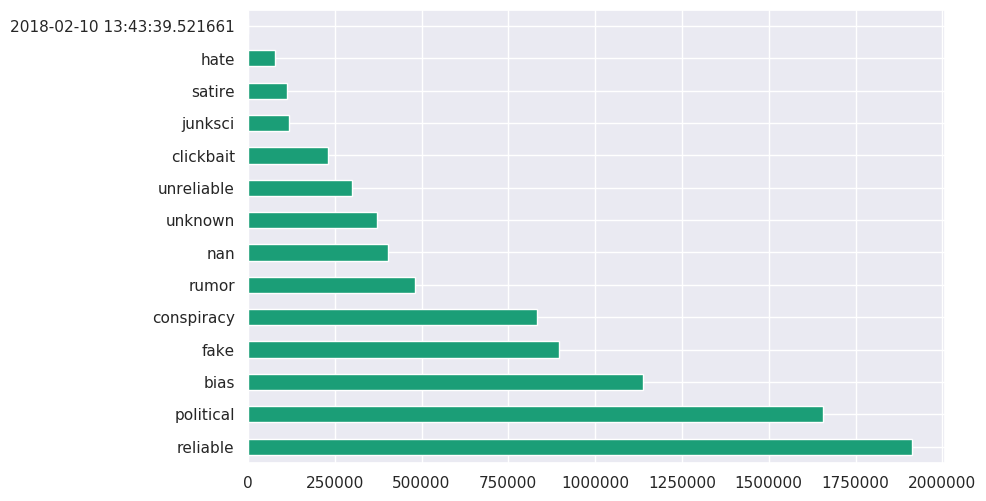

In [46]:
type.plot.barh()

In [47]:
frl_df['title'].head(15)

0     Is life an ILLUSION? Researchers prove 'realit...
1                                          Donald Trump
2                                          Donald Trump
3     MORE WINNING! Israeli intelligence source, DEB...
4     “Oh, Trump, you coward, you just wait, we will...
5     Following Guatemala’s decision to move its emb...
6     UN-Backed Police Massacred Haitians With Impunity
7                                   Black Agenda Report
8                                   Black Agenda Report
9     Zambia Must Clarify Whether It Will Host Israe...
10                                    BlackGenocide.org
11                          Request Speaking Engagement
12                                    BlackGenocide.org
13                     Why We Oppose Planned Parenthood
14                                     Email Protection
Name: title, dtype: object

In [49]:
frl_df['title'].tail(10)

8529080    Eric Holder’s Group Targets All-G.O.P. States ...
8529081    Snap Reverses Slide as User Growth and Revenue...
8529082    Do You Think Donald Trump Is Ready for a Real ...
8529083    Protesters in South Sudan Denounce U.S. Arms E...
8529084    Idaho Stripped Climate Change From School Guid...
8529085                Corruption With a Chance of Meatballs
8529086    Volatility Rattles Stocks, and Investors Who B...
8529087    As 4 of 5 in Public Housing Lost Heat, a Deman...
8529088            Who Said It: Pepé Le Pew or Donald Trump?
8529089    Toads Eat Beetles. Sometimes, Beetles Make The...
Name: title, dtype: object

In [58]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True